# Introduction to Linear Regression

-----


Linear regression is one of the most well known and well understood algorithms in statistics and machine learning. In this notebook, we will discuss the linear regression algorithm, how it works and how you can best use it in your machine learning projects. we will introduce the concept of minimizing a cost function to determine the optimal model parameters. We will demonstrate linear regression with scikit learn machine learning module and statsmodel library.

-----

## Table of Contents

[Formalism](#Formalism)

[Cost Function](#Cost-Function)

[Linear Regression with Scikit Learn](#Linear-Regression-with-Scikit-Learn)

- [Data Preparation](#Data-Preparation)

- [Linear Regression](#Linear-Regression)

[Linear Regression with StatsModel](#Linear-Regression-with-Statsmodels)

-----

Before proceeding with the _Formalism_ section of this Notebook, we first have our standard notebook setup code, after which we load a sample data set, the _tips_ data from Seaborn, and perform simple linear regression.

-----

In [1]:
# Set up Notebook

%matplotlib inline

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

-----

In this notebook, we will use the _tips_ data set from the Seaborn module. After loading this data into our Notebook, we display several random rows, and next compute a simple linear regression to predict the `tip` feature from the `total_bill` feature.

-----

In [2]:
# Load Data Set
tdf = sns.load_dataset('tips')

# Display several random rows
tdf.sample(5)

,total_bill,tip,sex,smoker,day,time,size
88,24.71,5.85,Male,No,Thur,Lunch,2
185,20.69,5.00,Male,No,Sun,Dinner,5
124,12.48,2.52,Female,No,Thur,Lunch,2
41,17.46,2.54,Male,No,Sun,Dinner,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2


-----

[Back to TOC](#Table-of-Contents)

## Formalism

-----

Linear regression is a linear model that assumes a linear relationship between the input variables (x or independent variable) and the single output variable (y or dependent variable). More specifically, that y can be calculated from a linear combination of the input variables (x). It constructs a simple model, such as
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$
from a data set. This model builds on assumptions, such as the y and x are linearly dependent and any errors in the regression are normally distributed, to build a model from the independent variables (i.e., $x_1..x_n$) for the dependent variable ($y$). In some application areas, the independent variables are known as the predictors, while the dependent variable is known as the response variable. If only one feature is used ($x$), the technique is known as simple linear regression, while if more than one feature is used ($x_1, x_2, ..., x_n$), the technique is known as multiple linear regression.

To make it simple, we start with simple linear regression. The simple linear model relates the independent variables $x_i$ to the dependent variables $y_i$ via two parameters: an intercept, and a slope. Mathematically, we express this relation in the following form:

$f(x_i) = \alpha + \beta * x_i + \epsilon_i$

where $\epsilon_i$ accounts for the difference between the model and the data for each data point $(x_i, y_i)$. If we have a perfect model, these errors, $\epsilon_i$, are all zero, and $y_i = f(x_i)$. In real life, however, the error terms rarely vanish because even if the original relationship is perfect noise creeps into the measurement process. 

As a result, in this simple example we wish to determine the model parameters: $\beta$, and $\alpha$ that minimize the values of $\epsilon_i$. We could perform this process in an iterative manner, trying different values for the model parameters and measuring the error function. This approach is often used in machine learning, where we define a **cost function** that we seek to minimize by selecting the best model parameters. 

In the case of a simple linear model, we have several potential cost (or loss) functions that we could seek to minimize, but we will use the common _l2-norm_: $\epsilon_i^2 = \left( \ y_i - f(x_i) \ \right)^2$, where $f(x_i)$ is defined by our model parameters. We demonstrate this approach visually in the following code block, where we minimize the sum of the _l2-norm_ model residuals, which is done by finding the best model parameters: $\hat{\beta}$, and $\hat{\alpha}$. 

**Note:** You are __not__ required to understand the following code. Please pay more attension to the plot and understand how $\epsilon$ is calculated.

-----

Minimial Cost (l2 Norm) = 13.76


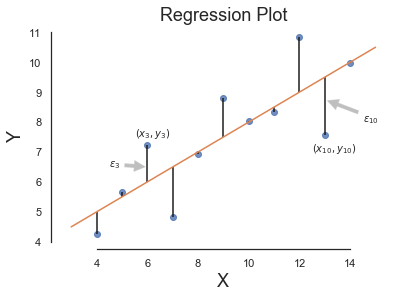

In [3]:
# Load Anscombe's Quartet
adf = sns.load_dataset("anscombe")

# Select only the first data set
adfi = adf[adf.dataset == 'I']

# Extract the x & y columns as NumPy arrays, 
# we call them xx and yy to avoid conflict with the tips data
xx = adfi.x.as_matrix()
yy = adfi.y.as_matrix()

# Number of data points
n = xx.shape[0]

# Determine mean values
mux = np.mean(xx)
muy = np.mean(yy)

# Determine best fit model parameters (from simple linear regression)
beta = np.sum((xx - mux) * (yy - muy)) / np.sum((xx - mux)**2)
alpha = muy - beta * mux

# Plot the data as a Regression Plot
ax = sns.regplot(x='x', y='y', data=adfi, fit_reg=False)

# Label plot
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_title('Regression Plot', fontsize=18)

# Compute and draw epsilons
fy = beta * xx + alpha
ax.vlines(xx, yy, fy)

print(f'Minimial Cost (l2 Norm) = {np.sum((fy - yy)**2):5.2f}')

# Annotate third point
ax.annotate(r'$(x_3, y_3)$', xy=(6, 7), xytext=(5.5, 7.5))

ax.annotate(r'$\epsilon_3$', xy=(6, 6.5), xytext=(4.5, 6.5),
            arrowprops=dict(facecolor='black', alpha =0.25, shrink = 0.05))

# Annotate tenth point
ax.annotate(r'$(x_{10}, y_{10})$', xy=(13, 7.5), xytext=(12.5, 7.0))

ax.annotate(r'$\epsilon_{10}$', xy=(13, 8.75), xytext=(14.5, 8.0),
            arrowprops=dict(facecolor='black', alpha =0.25, shrink = 0.05))

# Compute and plot linear model
xx = np.arange(3, 16)
yy = beta * xx + alpha
ax.plot(xx, yy)

sns.despine(offset = 5, trim=True)

-----

[Back to TOC](#Table-of-Contents)

## Cost Function

This simple example demonstrates a fundamental concept in machine learning, namely the minimization of a cost (or loss) function, which quantifies how well a model represents a data set. For a given data set, the cost function is completely specified by the model, thus a more complex model has a more complex cost function, which can become difficult to minimize. 

As we move to higher dimensional data sets or more complex cost functions, the challenge of finding the global minimum becomes increasingly difficult. As a result, many mathematical techniques have been developed to find the global minimum of a (potentially) complex function. The standard approach is [gradient descent][wgd], where we use the fact that the first derivative (or gradient) measures the slope of a function at a given point. We can use the slope to infer which direction is _downhill_ and thus travel (hopefully) towards the minimum. 

A major challenge with this approach is the potential to become stuck in a local and not global minima. Thus, modifications are often added to reduce the likelihood of becoming stuck in a local minimum. One popular example of this approach is known as [stochastic gradient descent][wsgd]. This algorithm employs standard gradient descent, but adds an occasional random jump in the parameter space to reduce the chances of being stuck in a local _valley_. Another, very different, approach to this problem is the use of [genetic algorithms][wga], which employ techniques from evolutionary biology to minimize the cost function.

For a mental picture of this process, imagine hiking in the mountains and trying to find the highest peak. We can use gradient ascent in this case. Gradient ascent is similar to finding the local mountain peak and climbing it. This local peak might look like it is the highest, but a random jump away from the local peak might enable one to view higher peaks beyond, which can subsequently be climbed with a new gradient ascent.

Whenever you perform machine learning in the future, you should keep in mind that the model that you generate for a given data set has generally resulted from the minimization of a cost function. Thus, there remains the possibility that with more effort, more data, or a better cost minimization strategy, a new, and better model may potentially exist.


-----

[wgd]: https://en.wikipedia.org/wiki/Gradient_descent
[wsgd]: https://en.wikipedia.org/wiki/Stochastic_gradient_descent
[wga]: https://en.wikipedia.org/wiki/Genetic_algorithm

[Back to TOC](#Table-of-Contents)

-----

## Linear Regression with Scikit Learn

------

The most commonly used statistical and machine learning library in Python is the [scikit learn][skl] library. This library includes a number of different model fitting techniques (in addition to general regression and classification algorithms) that can be easily applied to a data set. In this notebook, we will focus on the standard linear regression estimator, but much of what you learn in this notebook is applicable to other regressors in the scikit-learn library, since this library employs a standard interface.

To perform linear regression with the scikit-learn library, we first create a [`LinearRegression`][sklr] estimator, which is imported from the `linear_model` module in `scikit learn`.

```python
from sklearn.linear_model import LinearRegression
model = LinearRegression()
```
  
When this estimator is created, the following hyperparameters can be specified (they are all optional):
  
- `fit_intercept`: If `True`, the _default_, an intercept is fit for this model.
- `normalize`: If `True` all the features supplied in the `fit` method will be normalized, the _default_ is `False`.
- `copy_X`: If `True`, the _default_, the feature matrix will be copied, otherwise the data may be overwritten during the regression.
  
This regressor has two commonly used attributes, which can be accessed after the model has been fit to the data (note that model attributes in scikit learn are suffixed by an underscore):

- `coef_`: An array of the estimated coefficients for the regressed linear model, in typical usage this is a single dimensional array.
- `intercept_`: The constant term in the regressed linear model, only computed if `fit_intercept` is `True`.
  
Once created, this estimator is _fit_ to the training data, after which it can be used to _predict_ new values from the test data. These two actions, along with a measure of the performance of the regressor, are encapsulated in the following three functions that can be called on a `LinearRegression` estimator:
- `fit`: Fits a linear model to the supplied features(both independent and dependent features).
- `predict`: Predicts new results from the given model for the new supplied features
- `score`: Computes a regression score, specifically the coefficient of determination $R^2$ of the prediction.

-----
[skl]: http://scikit-learn.org/stable/index.html
[sklr]: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Data Preparation

Before computing a linear regression to the _tips_ data, we must first process these data to  make them ready for the `LinearRegression` estimator. For demonstration, we will choose `total_bill`, `size` and `time` as independent variables. Among them, `total_bill` and `size` are numeric features, while `time` is a categorical feature, which has two values, `Lunch` and `Dinner`. LinearRegression model can only accept numerical features, thus we need to encode categorical features. The scikit-learn library provides several different encodings in the preprocessing module. In this notebook, we will use the patsy module, which has function `dmatrices` that makes creating dependent and independent variables from a dataframe very easy as shown below:

```
import patsy as pts 
y, x = pts.dmatrices('tip ~ total_bill + size + C(time)', data=tdf, return_type='dataframe')
```

`tdf` is the dataframe that holds the tips dataset. The formula `tip ~ total_bill + size + C(time)` indicates that `tip` column is the dependent variable, and `total_bill`, `size` and `time` are independent variables. `time` is categorical feature so it is enclosed in parenthesis and prefixed with a C. `dmatrices` will return y which has values in `tip` column; Encode `time` and return `total_bill`, `size` and encoded `time` as x.

The `dmatrices` function takes this formula and the supplied data and returns the aggregated result, which in this case we have requested as two DataFrames: `x` for the independent variables and `y` for the dependent variable. 

Two important points to notice with `x`, the new independent feature DataFrame. First, patsy automatically created the dummy, or binarized, features for our categorical features. Second, notice that patsy also dropped one option for the categorical feature. This is not a bug, instead it is done to generate more robust results (something we probably should have been doing earlier). If we regress across all possible categorical options, we have introduced [unnecessary correlations][wdf] between our features. That is because if we have $n$ categorical features, we only need $n - 1$ dummy features to fully map all options (if they are all zero, it is the same as saying the $n^{th}$ dummy feature was one). This is known as [multicollinearity][wmc], and can lead to problems with convergence. To avoid this, you should always [drop one dummy feature][wmcr]. 

We have, for example, explicitly excluded using `time=Lunch` as a predictor. Thus, _Lunch_ is our reference category, for the `day` categorical features. Later, when we quantify the impact of one feature on the prediction, the measurements will be with respect to this reference category. An `Intercept` column with value 1.0 is created for all reference categories.

Next, we divide the data and labels into training:testing samples with a 60:40 split.

-----
[wmc]: https://en.wikipedia.org/wiki/Multicollinearity
[wmcr]: https://en.wikipedia.org/wiki/Multicollinearity#Remedies_for_multicollinearity

[wdf]: https://en.wikipedia.org/wiki/Dummy_variable_(statistics)#Interactions_among_dummy_variables


In [4]:
import patsy as pts 

# Create dependent and independent variables
y, x = pts.dmatrices('tip ~ total_bill + size + C(time)', data=tdf, return_type='dataframe')

In [5]:
x.head(2)

,Intercept,C(time)[T.Dinner],total_bill,size
0,1.0,1.0,16.99,2.0
1,1.0,1.0,10.34,3.0



Now we will split the dataset to training and testing. We set `random_state` to ensure repeatability.

In [6]:
from sklearn.model_selection import train_test_split
ind_train, ind_test, dep_train, dep_test = train_test_split(x, y, test_size=0.4, random_state=23)

----

### Linear Regression

With these data, we can now employ the scikit-learn library’s linear regression estimator to generate a linear model for these data. In the following code cells, we use the `LinearRegression` estimator to fit our sample data, plot the results, and finally display the fit coefficients.

After the model is trained, we can get coefficients from `model.coef_`. As a result, we display the regression formula with the coefficients. We also print the regression score which is $R^2$ of the linear regression.

----

In [7]:
from sklearn.linear_model import LinearRegression

# Create and fit our linear regression model to training data
model = LinearRegression()
model.fit(ind_train, dep_train)

# Display model fit parameters for training data
print(f"tip = {model.intercept_[0]:4.2f} + " + \
      f"{model.coef_[0][1]:4.2f} Dinner + " + \
      f"{model.coef_[0][2]:4.2f} total_bill + " + 
      f"{model.coef_[0][3]:4.2f} size")

# Compute model predictions for test data
results = model.predict(ind_test)

# Compute score and display result (Coefficient of Determination)
score = 100.0 * model.score(ind_test, dep_test)
print(f'LR Model score = {score:5.1f}%')


tip = 0.83 + -0.23 Dinner + 0.09 total_bill + 0.22 size
LR Model score =  44.2%


---
In above code, there are several things need more discussion:
1. We create `LinearRegression` Model by accepting default values for all hypterparameter. So `fit_intercept` is True, which means the model will calculate intercept. This makes the 'Intercept' column created by `dmatrices` useless. If you check the model's first coefficient by using `model.coef_[0][0]`, you will get 0. That's why we don't need the first coefficient to construct the linear formula. In the next code cell, we create `LinearRegression` model with `fit_intercept` set to False. This time the trained model will not have attribute `intercept_`.  We then use the first coefficient as the intercept. Both approaches give same result.
2. `predict` function is normally used to predict on data without known output. `ind_test` has known output `dep_test`. So it's not necessary to predict with `ind_test`. We put it here just to demonstrate how to use `predict` function.
3. `score` function takes 2 arguments, `ind_test` and `dep_test`. It will first predict on `ind_test` with the trained model, then compare the predicted result with the groud truth `dep_test`, then calculate $R^2$ value.
4. $R^2$ is one of the regression evaluation metrics. The value of $R^2$ is normally between 0 to 1. The larger the $R^2$, the more accurate the regression model is. We will discuss regression evaluation metrics in more detail in future lessons.

In [8]:
# Create model without fit_intercept
model = LinearRegression(fit_intercept=False)
model.fit(ind_train, dep_train)

# Display model fit parameters for training data
print(f"tip = {model.coef_[0][0]:4.2f} + " + \
      f"{model.coef_[0][1]:4.2f} Dinner + " + \
      f"{model.coef_[0][2]:4.2f} total_bill + " + 
      f"{model.coef_[0][3]:4.2f} size")

# Compute score and display result (Coefficient of Determination)
score = 100.0 * model.score(ind_test, dep_test)
print(f'LR Model score = {score:5.1f}%')


tip = 0.83 + -0.23 Dinner + 0.09 total_bill + 0.22 size
LR Model score =  44.2%


-----

<font color='red' size = '5'> Student Exercise </font>

In the preceding cells, we used multi-variate linear regression to predict the `tip` feature from the `total_bill`, `size` and categorical `time` features. In the empty **Code** cell below, repeat this process, but use the `total_bill`, `size`, `sex`, and `time` features. Has the prediction performance improved?

-----

----

[Back to TOC](#Table-of-Contents)

## Linear Regression with Statsmodels

Scikit-learn is the dominant Python machine learning library, and will be the primary library we use to generate models from data. However, an alternative library, [_statsmodels_][sm] is being developed that focuses more on statistical analyses, along with easier integration with the Pandas DataFrame. To demonstrate this new library and how it can be used to perform linear regression, we demonstrate the statsmodels library in the next few code cells to perform linear regression on the _tips_ data. 

Given an appropriate DataFrame, in this case the _tips_ DataFrame, we can easily employ the formulaic interface to obtain an ordinary least squares fit to the data of interest. The formulaic interface is borrowed from the `R` programming language (which drives much of the development of the statsmodels library), and simply relates the dependent variable to the independent variables (or features).

In this example, we map the `tip` label to the `total_bill`, `size` and `time` features, this will include the constant term in the calculation. At the end we call the `summary` method, which generates a detailed report showing the fit parameters, and a number of performance metrics.

Notice that the absolute of `t` value of T.Dinner's coefficient is less than 2, which means the coefficient is not significant, or time of the meal has no impact on tip.

**Note:** LinearRegression in sckit learn doesn't return coefficient significance directly, you will need to calculate them from the model's attributes.

-----

[sm]: http://statsmodels.sourceforge.net



In [9]:
import statsmodels.formula.api as smf

# Implement simple regression: Result ~ Input

# First we fit slope and intercept
result = smf.ols(formula='tip ~ total_bill + size + C(time)', data=tdf).fit()

print(f"tip = {result.params[0]:4.2f} + {result.params[1]:4.2f} T.Dinner + {result.params[2]:4.2f} total_bill + {result.params[3]:4.2f} size") 
print(f'Regression Score: {result.rsquared:4.2f}\n')

tip = 0.67 + -0.00 T.Dinner + 0.09 total_bill + 0.19 size
Regression Score: 0.47



In [10]:
# Display model fit and performance metrics
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     70.34
Date:                Wed, 11 Sep 2019   Prob (F-statistic):           1.13e-32
Time:                        09:50:32   Log-Likelihood:                -347.98
No. Observations:                 244   AIC:                             704.0
Df Residuals:                     240   BIC:                             718.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6712      0.210      3.197      0.002       0.258       1.085
C(time)[T.Dinner]    -0.0041      0.148     -0.028      0.978      -0.295       0.286
total_bill            0.0928      0.009     10.037      0.000       0.075       0.111
size                  0.1926      0.085      2.253      0.025       0.024       0.361
==============================================================================
Omnibus:                       24.790   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.226
Skew:                           0.546   Prob(JB):                     9.17e-11
Kurtosis:                       4.831   Cond. No.                         76.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-----

## Ancillary Information

The following links are to additional documentation that you might find helpful in learning this material. Reading these web-accessible documents is completely optional.

1. The Wikipedia article on [linear regression][1]
2. A Python-based [tutorial on linear regression][tlr] that focuses on the statsmodels library
3. A blog article using [linear regression to predict housing prices][5] in Python


-----
[1]: https://en.wikipedia.org/wiki/Linear_regression
[tlr]: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

[5]: http://www.learndatasci.com/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/?imm_mid=0eddcf&cmp=em-data-na-na-newsltr_20170301


**&copy; 2019: Gies College of Business at the University of Illinois.**

This notebook is released under the [Creative Commons license CC BY-NC-SA 4.0][ll]. Any reproduction, adaptation, distribution, dissemination or making available of this notebook for commercial use is not allowed unless authorized in writing by the copyright holder.

[ll]: https://creativecommons.org/licenses/by-nc-sa/4.0/legalcode 